# Markov Chains

## Imports

In [70]:
import numpy as np
import pandas as pd
import random
import music21
from google.colab import files


## Midi-Pitches
Tonhöhen werden in MIDI als ganze Zahlen (sog. Integers) abgespeichert. Die tiefste Note ist 0, die höchste 127. 
Diese Zahlen können wir nutzen um zu zählen, welcher Ton wie oft auf welchen anderen Ton folgt.
Dazu nehmen wir uns zunächst zwei einfache Melodien.

In [2]:
brother_john = [60, 62, 64, 60, 60, 62, 64, 60]
little_lamb = [64, 62, 60, 62, 64, 64, 64]

## Übergangs-Wahrscheinlichkeiten
Diese beiden Listen repräsentieren zwei kurze Melodien. Nun müssen wir zählen, wie oft welcher Ton auf welchen anderen Ton folgt. Dazu erstellen wir eine Tabelle mit der Python-Bibliothek `pandas`. 

In [37]:
def make_table(allSeq):
 # find the highest note
 n = max([ max(s) for s in allSeq ]) + 1
 # fill the table with zeros
 arr = np.zeros((n,n), dtype=int)
 for s in allSeq:
  for i,j in zip(s[1:],s[:-1]):
   ind = (i,j)
   arr[ind] += 1
 return pd.DataFrame(arr).rename_axis(index='Next', columns='Current')

In [61]:
transitions = make_table([brother_john, little_lamb])

Diese Tabelle wird später die Grundlage für die Markov-Kette sein. Um sich die Tabelle anzusehen, können wir die Funktion `show_table` nutzen.

In [73]:
def show_table(transitions):
    """
    Show a transition table as a heatmap
    """
    import seaborn as sns
    import matplotlib.pyplot as plt
    simplified_df = transitions[transitions != 0].dropna(how='all', axis=0).dropna(how='all', axis=1).fillna(0).astype(int)
    sns.heatmap(simplified_df, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()
    display(simplified_df)

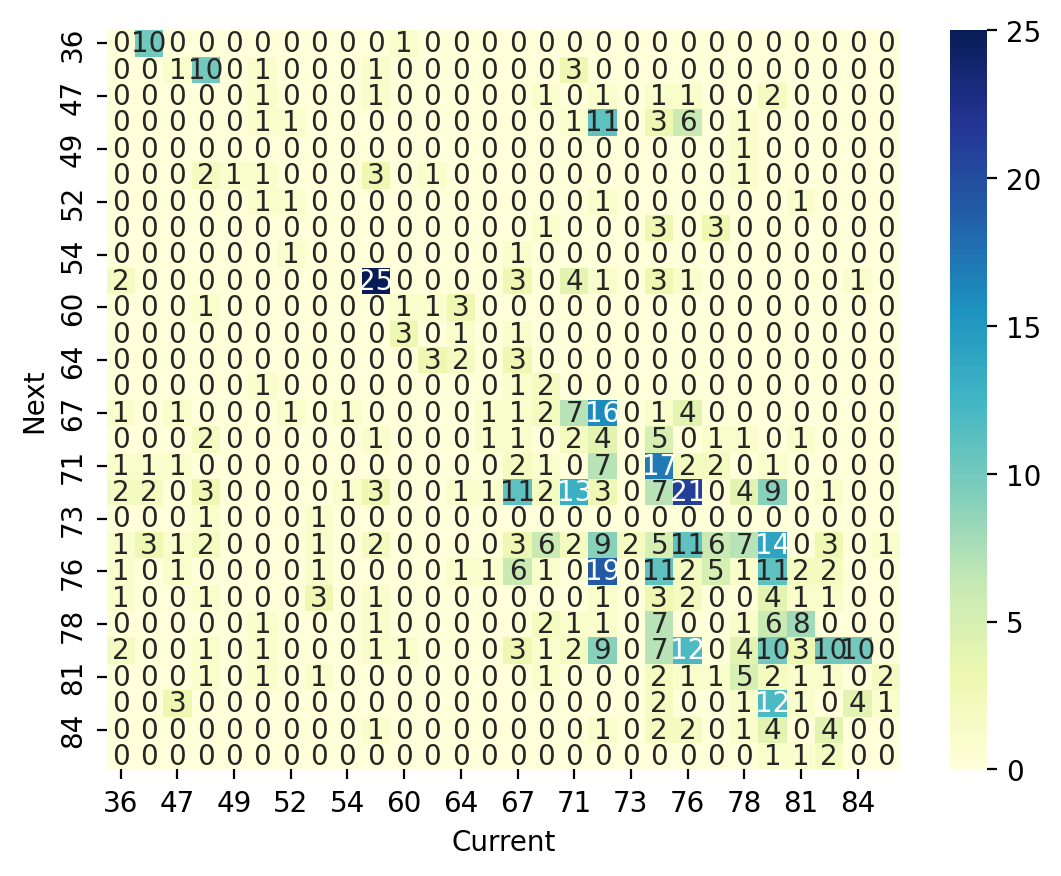

Current,36,43,47,48,49,50,52,53,54,55,60,62,64,66,67,69,71,72,73,74,76,77,78,79,81,83,84,86
Next,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36,0,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,0,0,1,10,0,1,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,2,0,0,0,0
48,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,11,0,3,6,0,1,0,0,0,0,0
49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
50,0,0,0,2,1,1,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
52,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,3,0,0,0,0,0,0
54,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
show_table(transitions)

## Markov-Kette
Nun benötigen wir eine Funktion, die uns anhand des vorangegangen Tones und den Übergangs-Wahrscheinlichkeiten in der Tabelle, den nächsten Ton voraussagt.

In [65]:
def get_next_term(t_s):
 # get the index of the next term based on the weights in the transition table
 return random.choices(t_s.index, t_s)[0]


Um diese Funktion nun mehrmals aufzurufen, können wir eine Schleife nutzen. Diese Schleife wird so lange laufen, bis wir eine gewünschte Länge erreicht haben.

In [9]:
def make_chain(transition_table, start_note, length):
 """
 Create a Markov chain of a given length with a given starting note, based on a transition table
 """
 chain = [start_note]
 for i in range(length-1):
  chain.append(get_next_term(transition_table[chain[-1]]))
 return chain

Wenn wir nun `make_chain` aufrufen, erhalten wir eine neue Melodie, die auf den Übergangs-Wahrscheinlichkeiten der alten Melodie basiert.

In [68]:
simple_chain = make_chain(transitions, 60, 10)

Diese Melodie können wir nun mit `save_midi_pitches` in MIDI umwandeln und abspielen.

In [32]:
def save_midi_pitches(midi_notes, file_path):
    """
    Saves a list of midi pitches to a midi file
    """
    midi_stream = music21.stream.Stream()
    for note in midi_notes:
        midi_stream.append(music21.note.Note(note))
    midi_stream.write('midi', file_path)

In [ ]:
save_midi_pitches(simple_chain, "simple_chain.mid")

## Längere Melodien aus MIDI-Dateien laden
Um die Übergangs-Wahrscheinlichkeiten aussagekräftiger zu machen, können wir längere Melodien aus MIDI-Dateien laden. Dazu nutzen wir die Bibliothek `music21`.

In [30]:
def get_pitches(midi_file_path):
    """
    Returns a list of midi pitches from a midi file
    """
    midi_pitches = []
    midi_file = music21.converter.parse(midi_file_path)
    notes_to_parse = None
    parts = music21.instrument.partitionByInstrument(midi_file)
    if parts: # file has instrument parts
        notes_to_parse = parts.parts[0].recurse()
    else: # file has notes in a flat structure
        notes_to_parse = midi_file.flat.notes
    for note in notes_to_parse:
        if isinstance(note, music21.note.Note):
            midi_pitches.append(note.pitch.midi)
    return midi_pitches

Mit dem folgenden Code können wir MIDI-Dateien auf den Server laden.

In [ ]:
uploaded_files = files.upload()

Wir laden dann alle Tonhöhen der hochgeladenen MIDI-Dateien in eine Liste 

In [ ]:
pitches = []
for file in uploaded_files:
    pitches.append(get_pitches(file))
    print(f"Added {file} to the list of pitches")


Dann erstellen wir für diese Liste eine neue Tabelle.

In [60]:
new_transitions = make_table(pitches)
show_table(new_transitions)

Und schließlich können wir mit dieser Tabelle eine neue Melodie generieren.

In [ ]:
complex_chain = make_chain(new_transitions, 60, 10)
save_midi_pitches(complex_chain, "new_chain.mid")